In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
%matplotlib inline

In [288]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["TeX Gyre Termes", "Nimbus Roman", "Liberation Serif"]
plt.rcParams["font.style"] = "normal"
plt.rcParams["font.weight"] = "normal"


In [289]:
def get_feature_type(family):
    f = family.lower()
    if f.startswith("tfidf"):
        return "tfidf"
    elif f.startswith("fasttext"):
        return "fasttext"
    elif f.startswith("wfe"):
        return "wfe"
    elif f.startswith("wefe"):
        return "wefe"
    elif f.startswith("fe"):
        return "fe"
    elif f.startswith("we"):
        return "we"
    else:
        return "other"  # just in case

FEATURES = ["fasttext", "we", "wfe", "wefe", "fe"]

latex_labels = {
    "fasttext": r"$\mathcal{R}_{\mathrm{FT}}$",
    "we": r"$\mathcal{R}_{\mathrm{S}}$",
    "wefe": r"$\mathcal{R}_{\mathrm{H}}$",
    "wfe": r"$\mathcal{R}_{\mathrm{D}}$",
    "fe": r"$\mathcal{R}_{\mathrm{LLM}}$"
}

In [290]:
SAVE_FOLDER = "./generated_figures"
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [291]:
sentiment_data = pd.read_csv("./generated/jetson/sentiment/single/all_lang.csv")
sentiment_data = sentiment_data[sentiment_data.FeatureFamily!='tfidf']
sentiment_data['FeatureType'] = sentiment_data['FeatureFamily'].apply(get_feature_type)
sentiment_data['EDP'] = sentiment_data['time_per_sample'] * clst_data['energy_per_sample']
sentiment_data['FeatureType'].value_counts()

FeatureType
we          2400
wefe        2400
wfe          960
fe           960
fasttext     400
Name: count, dtype: int64

In [292]:
clst_data = pd.read_csv("./generated/jetson/clustering/all_lang.csv")
clst_data = clst_data[clst_data.FeatureFamily != 'tfidf']
clst_data['FeatureType'] = clst_data['FeatureFamily'].apply(get_feature_type)
clst_data['EDP'] = clst_data['time_per_sample'] * clst_data['energy_per_sample']
clst_data['FeatureType'].value_counts()

FeatureType
we          300
wefe        300
wfe         120
fe          120
fasttext     50
Name: count, dtype: int64

In [293]:
clst_data.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'Model', 'TrainingTime',
       'train_silhouette_score', 'train_calinski_harabasz_score',
       'train_davies_bouldin_score', 'train_adjusted_rand_score',
       'train_normalized_mutual_info_score', 'train_v_measure_score',
       'train_homogeneity_score', 'train_completeness_score', 'train_f1_score',
       'data_pts', 'time_sec', 'energy_kwh', 'throughput', 'time_per_sample',
       'energy_per_sample', 'FeatureType', 'EDP'],
      dtype='object')

# Task Performance Measurement -- Boxplots

In [335]:
bsd = sentiment_data[sentiment_data.N_class == 2]
bsd = bsd.reset_index(drop=True)
bsd.tail()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
3555,WEFE-mE5-S,borep,turkish,2,XGBoost,0.921807,0.922195,0.777433,0.778496,30.251130,NaN,NaN,600,6.329448,0.000015,94.795004,0.010549,2.561330e-08,wefe,NaN
3556,WEFE-mE5-S,borep,turkish,2,GaussianNB,0.672178,0.677629,0.669165,0.674761,7.769001,NaN,NaN,600,6.093627,0.000015,98.463522,0.010156,2.480347e-08,wefe,NaN
3557,WEFE-mE5-S,borep,turkish,2,linear,0.787310,0.776414,0.773217,0.761571,226.823506,6402.0,17.0,600,6.295417,0.000015,95.307434,0.010492,2.555005e-08,wefe,NaN
3558,WEFE-mE5-S,borep,turkish,2,microffn,0.843709,0.842988,0.773276,0.772312,370.343668,259642.0,16.0,600,6.240881,0.000015,96.140269,0.010401,2.508841e-08,wefe,NaN
3559,WEFE-mE5-S,borep,turkish,2,resmicro,0.816612,0.804116,0.764961,0.747500,433.510324,845186.0,17.0,600,6.373591,0.000016,94.138454,0.010623,2.584135e-08,wefe,NaN


In [295]:
tsd = sentiment_data[sentiment_data.N_class == 3]
tsd = tsd.reset_index(drop=True)
tsd.head()

,FeatureFamily,FeatureVariant,Dataset,N_class,Model,AccuracyTrain,WeightedF1Train,AccuracyTest,WeightedF1Test,TrainingTime,NumParams,NumEpochs,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,fasttext,mean,arabic,3,LightGBM,0.975597,0.975654,0.650529,0.649760,71.274836,NaN,NaN,600,83.817032,0.000163,7.158450,0.139695,2.722107e-07,fasttext,3.056431e-09
1,fasttext,mean,arabic,3,LogisticRegression,0.658181,0.636802,0.655144,0.632883,292.728045,NaN,NaN,600,83.397225,0.000162,7.194484,0.138995,2.706280e-07,fasttext,3.032242e-09
2,fasttext,mean,arabic,3,RandomForest,0.819951,0.822079,0.605194,0.604903,4.108992,NaN,NaN,600,83.762614,0.000163,7.163100,0.139604,2.712570e-07,fasttext,3.080979e-09
3,fasttext,mean,arabic,3,XGBoost,0.995807,0.995809,0.662745,0.653332,11.074627,NaN,NaN,600,83.341255,0.000162,7.199316,0.138902,2.697791e-07,fasttext,3.051244e-09
4,fasttext,mean,arabic,3,GaussianNB,0.395964,0.382090,0.394082,0.380044,0.630886,NaN,NaN,600,83.682790,0.000163,7.169933,0.139471,2.711601e-07,fasttext,2.953016e-09


In [296]:
import matplotlib.pyplot as plt

CLS_TARGET = "WeightedF1Test"

data = []
labels = []

# Collect data from all groups
for source in [bsd, tsd]:
    for feat in FEATURES:
        data.append(source[source["FeatureType"]==feat][CLS_TARGET])
        labels.append(latex_labels[feat])

CLS_TARGET = "train_v_measure_score"
for feat in FEATURES:
    data.append(clst_data[clst_data["FeatureType"]==feat][CLS_TARGET])
    labels.append(latex_labels[feat])

# Colors and hatches per feature
feature_colors = ['#4A90E2', '#2A6FCC', '#3CB371', '#2E8B57', '#1E5F3C', '#9B59B6']
feature_hatches = ['/', '//', '.', '..', '...', 'xx']

BOX_WIDTH = 0.02
median_color = '#FF4500'
INTRA_GAP = 0.005
INTER_GAP = 0.05

positions = []
startpos = 0
group_boundaries = []
group_sizes = [len(FEATURES), len(FEATURES), len(FEATURES)]

for group_size in group_sizes:
    group_start = startpos
    for _ in range(group_size):
        positions.append(startpos)
        startpos += BOX_WIDTH + INTRA_GAP
    group_end = startpos - INTRA_GAP
    group_boundaries.append((group_start, group_end))
    startpos += INTER_GAP - INTRA_GAP

fig, ax = plt.subplots(figsize=(7,4))

# Plot boxes
for i, pos in enumerate(positions):
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[pos],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False
    )

    feature_idx = i % len(FEATURES)
    color = feature_colors[feature_idx]
    hatch = feature_hatches[feature_idx]

    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatch, edgecolor=color, linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=color, linewidth=1)
    for cap in box['caps']:
        cap.set(color=color, linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

# X-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=40, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Vertical separators
for start, end in group_boundaries[:-1]:
    ax.axvline(x=end + INTRA_GAP/2, color='gray', linestyle='--', linewidth=0.8)

# Adjust ylim to give space for labels
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax*1.12)  # increase top 12%

# Add group labels using axes transform (so always at top)
for i, (start, end) in enumerate(group_boundaries):
    mid = (start + end) / 2
    if i == 0:
        label = "Binary SA\n(F1-Weighted)"
    elif i == 1:
        label = "Ternary SA\n(F1-Weighted)"
    else:
        label = "Clustering\n(V-Measure)"
    
    ax.text(mid-0.01, 1.02, label, ha='center', va='bottom', fontsize=14, transform=ax.get_xaxis_transform())

# X-limits
margin = 0.02
ax.set_xlim(positions[0] - margin, positions[-1] + margin)

plt.tight_layout()
plt.savefig(SAVE_FOLDER+os.sep+"performance_boxplots.pdf", format='pdf', bbox_inches='tight')

## Heatmaps

In [297]:
bsd.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'N_class', 'Model',
       'AccuracyTrain', 'WeightedF1Train', 'AccuracyTest', 'WeightedF1Test',
       'TrainingTime', 'NumParams', 'NumEpochs', 'data_pts', 'time_sec',
       'energy_kwh', 'throughput', 'time_per_sample', 'energy_per_sample',
       'FeatureType', 'EDP'],
      dtype='object')

In [298]:
# Group by two features and compute median
pivot_table = bsd.groupby(['Dataset', 'FeatureType'])['WeightedF1Test'].median().reset_index()
heatmap_data1 = pivot_table.pivot(index='Dataset', columns='FeatureType', values='WeightedF1Test')
heatmap_data1 = heatmap_data1[FEATURES]

pivot_table = tsd.groupby(['Dataset', 'FeatureType'])['WeightedF1Test'].median().reset_index()
heatmap_data2 = pivot_table.pivot(index='Dataset', columns='FeatureType', values='WeightedF1Test')
heatmap_data2 = heatmap_data2[FEATURES]


pivot_table = clst_data.groupby(['Dataset', 'FeatureType'])['train_v_measure_score'].median().reset_index()
heatmap_data3 = pivot_table.pivot(index='Dataset', columns='FeatureType', values='train_v_measure_score')
heatmap_data3 = heatmap_data3[FEATURES]


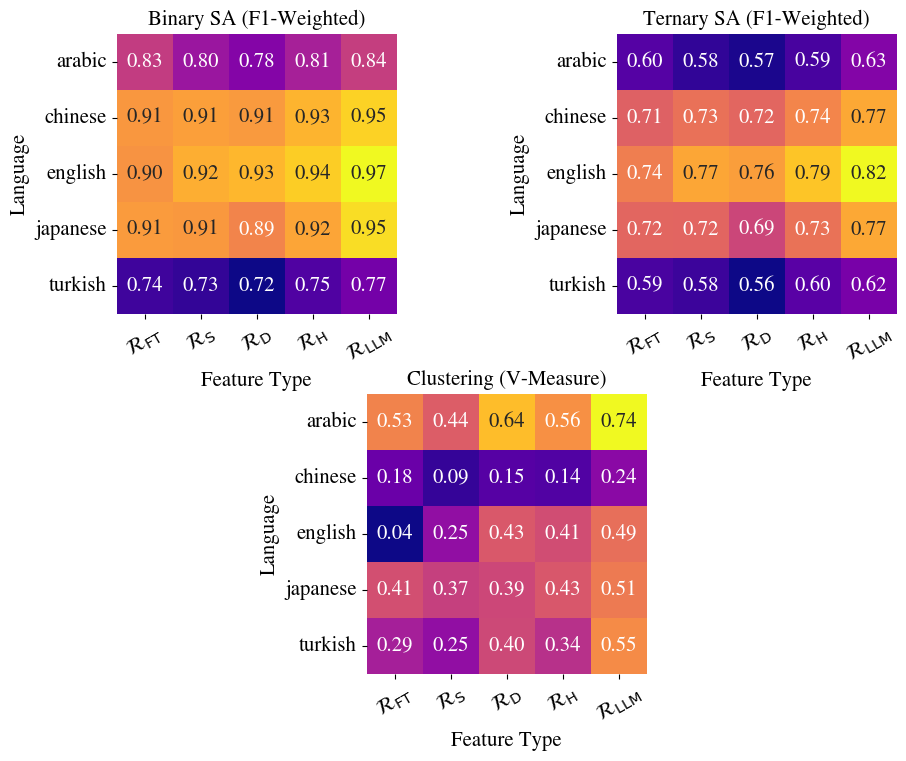

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data_list = [heatmap_data1, heatmap_data2, heatmap_data3]
titles = ["Binary SA (F1-Weighted)", "Ternary SA (F1-Weighted)", "Clustering (V-Measure)"]

fig = plt.figure(figsize=(10, 8))

# Define positions in figure coordinates: [left, bottom, width, height]
ax1 = fig.add_axes([0.05, 0.55, 0.4, 0.35])
ax2 = fig.add_axes([0.55, 0.55, 0.4, 0.35])
ax3 = fig.add_axes([0.275, 0.1, 0.45, 0.35])  # centered bottom

axes = [ax1, ax2, ax3]

for ax, data, title in zip(axes, heatmap_data_list, titles):
    sns.heatmap(
        data,
        ax=ax,
        cbar=False,
        annot=True,
        annot_kws={"size": 15},
        fmt=".2f",
        cmap="plasma",
        xticklabels=[latex_labels.get(col, col) for col in data.columns],
        yticklabels=data.index,
        square=True
    )
    
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Feature Type", fontsize=15)
    ax.set_ylabel("Language", fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.savefig(SAVE_FOLDER+os.sep+"perlang_heatmap.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Complementary Table

In [325]:
metric = 'train_adjusted_rand_score'
for feat in FEATURES:
    s = clst_data[clst_data.FeatureType == feat][metric]
    med_val, max_val, min_val = s.median(), s.max(), s.min()
    print(f"{feat}: {min_val:.2f} / {med_val:.2f} / {max_val:.2f}")
    print("-" * 30)

fasttext: 0.01 / 0.22 / 0.50
------------------------------
we: 0.01 / 0.20 / 0.64
------------------------------
wfe: 0.02 / 0.27 / 0.86
------------------------------
wefe: 0.02 / 0.30 / 0.87
------------------------------
fe: 0.01 / 0.39 / 0.84
------------------------------


In [326]:
metric = 'AccuracyTest'
for feat in FEATURES:
    s = bsd[bsd.FeatureType == feat][metric]
    med_val, max_val, min_val = s.median(), s.max(), s.min()
    print(f"{feat}: {min_val:.2f} / {med_val:.2f} / {max_val:.2f}")
    print("-" * 30)

fasttext: 0.51 / 0.86 / 0.94
------------------------------
we: 0.35 / 0.86 / 0.96
------------------------------
wfe: 0.46 / 0.87 / 0.95
------------------------------
wefe: 0.45 / 0.89 / 0.96
------------------------------
fe: 0.45 / 0.91 / 0.98
------------------------------


In [327]:
metric = 'AccuracyTest'
for feat in FEATURES:
    s = tsd[tsd.FeatureType == feat][metric]
    med_val, max_val, min_val = s.median(), s.max(), s.min()
    print(f"{feat}: {min_val:.2f} / {med_val:.2f} / {max_val:.2f}")
    print("-" * 30)

fasttext: 0.34 / 0.69 / 0.79
------------------------------
we: 0.24 / 0.67 / 0.82
------------------------------
wfe: 0.30 / 0.66 / 0.81
------------------------------
wefe: 0.25 / 0.68 / 0.83
------------------------------
fe: 0.31 / 0.72 / 0.87
------------------------------


# BEST PERFORMER

In [336]:
metric = 'train_adjusted_rand_score'
columns_to_show = ['Dataset', metric, 'FeatureVariant', 'FeatureFamily']

# Group by two features
grouped = clst_data.groupby(['FeatureType', 'Dataset'])

# Find row(s) with max value per group
for (feat_family, feat_type), group in grouped:
    max_val = group[metric].max()
    rows_with_max = group[group[metric] == max_val]
    
    print(f"\nFeatureType: {feat_type} | Max {metric} = {max_val:.2f}")
    print(rows_with_max[columns_to_show])



FeatureType: arabic | Max train_adjusted_rand_score = 0.50
   Dataset  train_adjusted_rand_score FeatureVariant FeatureFamily
56  arabic                   0.501521            sif      fasttext

FeatureType: chinese | Max train_adjusted_rand_score = 0.12
    Dataset  train_adjusted_rand_score FeatureVariant FeatureFamily
66  chinese                   0.122409            sif      fasttext

FeatureType: english | Max train_adjusted_rand_score = 0.27
    Dataset  train_adjusted_rand_score FeatureVariant FeatureFamily
76  english                   0.267495            sif      fasttext

FeatureType: japanese | Max train_adjusted_rand_score = 0.37
     Dataset  train_adjusted_rand_score FeatureVariant FeatureFamily
80  japanese                   0.369455           mean      fasttext

FeatureType: turkish | Max train_adjusted_rand_score = 0.43
    Dataset  train_adjusted_rand_score FeatureVariant FeatureFamily
96  turkish                   0.434751            sif      fasttext

FeatureType: a